This is the correct spaxel assignment function in my oppinion:

coords [[0.5 1.5]
 [2.5 3.5]]
number_of_bins 4
x_indices [0 2]
y_indices [1 3]
pixel_positions [ 4 14]


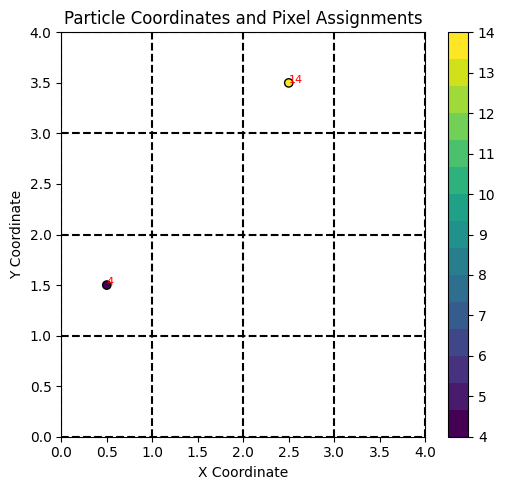

In [2]:
from rubix.telescope.utils import square_spaxel_assignment
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from jaxtyping import Float, Array 
import jax.numpy as jnp
import numpy as np

def square_spaxel_assignment(
    coords: Float[Array, " n_stars 3"], spatial_bin_edges: Float[Array, " n_bins"]
) -> Float[Array, " n_stars"]:
    """Bin the particle coordinates into a 2D image with the given bin edges for square pixels.

    This function takes the particle coordinates and bins them into a 2D image with the given bin edges.
    The binning is done by digitizing the x and y coordinates of the particles and then calculating the
    flat indices of the 2D image.

    The returned indexes are the pixel assignments of the particles. Indexing starts at 0.

    Parameters
    ----------
    coords : jnp.array (n, 3)
        The particle coordinates.

    spatial_bin_edges : jnp.array
        The bin edges for the spatial bins.

    Returns
    -------
    jnp.array
        The flat pixel assignments of the particles. Indexing starts at 0.

    """

    # Calculate assignment of of x and y coordinates to bins separately
    x_indices = (
        jnp.digitize(coords[:, 0], spatial_bin_edges) -1
    )  # -1 to start indexing at 0
    y_indices = jnp.digitize(coords[:, 1], spatial_bin_edges) -1

    number_of_bins = len(spatial_bin_edges) -1
    # Clip the indices to the valid range
    x_indices = jnp.clip(x_indices, 0, number_of_bins - 1)
    y_indices = jnp.clip(y_indices, 0, number_of_bins - 1)


    # Flatten the 2D indices to 1D indices
    pixel_positions = x_indices + (number_of_bins * y_indices)

    return pixel_positions



coords = np.array([[0.5, 1.5], [2.5, 3.5]])
print("coords", coords)
spatial_bin_edges = np.array([0, 1, 2, 3, 4])


# Compute the pixel assignments
pixel_assignments = square_spaxel_assignment(coords, spatial_bin_edges)

# Create a discrete colormap
max_assignment = np.max(pixel_assignments)
colors = plt.cm.viridis(np.linspace(0, 1, int(max_assignment) + 1))
cmap = ListedColormap(colors)

# Plot the results
plt.figure(figsize=(10, 5))

# Plotting the particles with labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=pixel_assignments, cmap=cmap, edgecolor='k')
plt.colorbar(scatter, ticks=np.arange(0, max_assignment + 1))
plt.title('Particle Coordinates and Pixel Assignments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(spatial_bin_edges[0], spatial_bin_edges[-1])
plt.ylim(spatial_bin_edges[0], spatial_bin_edges[-1])


# Label each point with its pixel index
for i, (x, y) in enumerate(coords[:, :2]):
    plt.text(x, y, str(pixel_assignments[i]), color='red', fontsize=8)


#create the bins
for edge in spatial_bin_edges:
    plt.axvline(edge, color='k', linestyle='--')
    plt.axhline(edge, color='k', linestyle='--')

plt.tight_layout()
plt.show()


In [3]:
np.random.normal(0, 1, (10, 3)).shape

(10, 3)

number_of_bins 4
x_indices [2 2 1 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1
 0 2 2 2 1 2 2 1 2 2 2 1 1 2 2 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1
 1 2 1 2 1 1 1 2 2 1 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1
 2 2 1 2 2 1 2 1 1 1 2 1 1 1 2 2 2 2 2 1 2 2 2 2 1 3 1 2 2 1 1 2 0 2 1 2 2
 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 2 2
 2 2 1 2 2 1 1 2 2 2 2 1 1 1 1 1 2 1 2 1 0 2 2 0 1 2 2 1 2 1 2 2 1 2 1 2 3
 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 2 0 1 2 1 1 2 2 1 2 3 2 2 1 2 1 1 1 1 1 1 2
 2 2 1 2 1 0 2 0 2 1 1 2 1 2 2 1 1 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 1 2 2 2 2
 1 2 1 2 1 2 3 2 1 1 1 2 2 2 1 1 2 2 1 1 1 2 2 0 2 1 1 2 1 2 1 2 1 1 2 1 0
 2 2 2 2 1 2 2 2 2 1 1 2 1 1 2 2 1 0 2 1 2 1 1 2 2 2 1 1 2 2 1 3 1 2 2 2 1
 1 2 2 1 1 1 2 2 2 2 1 2 1 2 2 1 1 2 1 2 1 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 0
 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 3 2 1 2 2 2 2 2 2 2 0 2 2 2 1 2 2 1 2 2 1 1
 1 2 2 1 1 2 2 1 2 2 2 1 2 1 1 2 2 1 2 1 2 2 1 1 1 2 1 2 0 2 2 2 2 1 1 2 

<Figure size 1000x500 with 0 Axes>

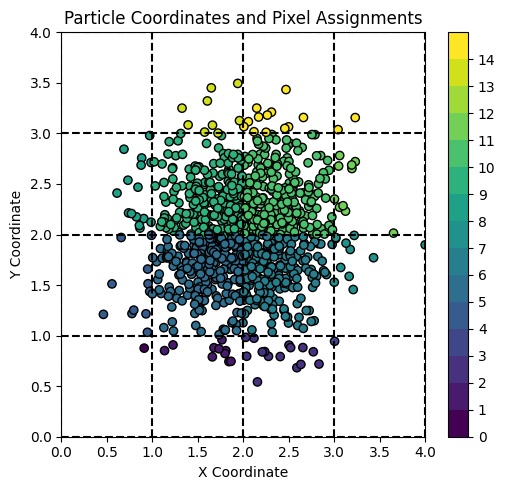

In [4]:
#create random data
n_stars = 1000
coords = np.random.normal(2, 0.5, (n_stars, 3))

# Compute the pixel assignments
pixel_assignments = square_spaxel_assignment(coords, spatial_bin_edges)

# Plot the results
plt.figure(figsize=(10, 5))


# Plot the results
plt.figure(figsize=(10, 5))

# Plotting the particles with labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=pixel_assignments, cmap=cmap, edgecolor='k')
plt.colorbar(scatter, ticks=np.arange(0, max_assignment + 1))
plt.title('Particle Coordinates and Pixel Assignments')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(spatial_bin_edges[0], spatial_bin_edges[-1])
plt.ylim(spatial_bin_edges[0], spatial_bin_edges[-1])


#create the bins
for edge in spatial_bin_edges:
    plt.axvline(edge, color='k', linestyle='--')
    plt.axhline(edge, color='k', linestyle='--')

plt.tight_layout()
plt.show()


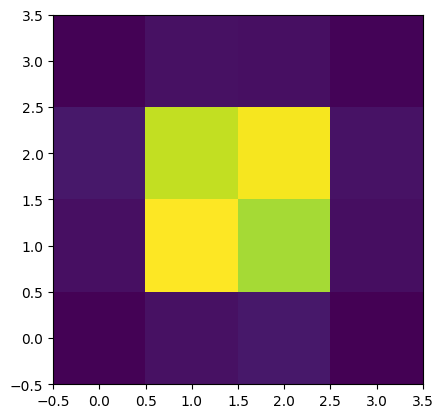

In [7]:
image = np.zeros((len(spatial_bin_edges) - 1, len(spatial_bin_edges) - 1))

# Count the number of particles in each pixel
for i in range(len(spatial_bin_edges) - 1):
    for j in range(len(spatial_bin_edges) - 1):
        image[i, j] = np.sum(pixel_assignments == (i + (len(spatial_bin_edges) - 1) * j))
        
        
plt.imshow(image, cmap='viridis', origin='lower')